In [133]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint

cid = "e95094f95f8b4a5089263af1484fec78"
secret = "471a83d85bf843c99f368383a7a5c0e4"
username = "elizabethrose20@yahoo.com"
redirect_uri = "https://example.com/callback/"

os.environ["SPOTIPY_CLIENT_ID"] = cid
os.environ["SPOTIPY_CLIENT_SECRET"] = secret
os.environ["SPOTIPY_REDIRECT_URI"] = redirect_uri

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

print(sp)

In [88]:
playlists = sp.user_playlists('spotify')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
   4 spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   5 spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
   6 spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   7 spotify:playlist:37i9dQZF1DX10zKzsJ2jva ¡Viva Latino!
   8 spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   9 spotify:playlist:37i9dQZF1DX4E3UdUs7fUx Afternoon Acoustic
  10 spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
  11 spotify:playlist:37i9dQZF1DWYV7OOaGhoH0 Roots Rising
  12 spotify:playlist:5JdIoXkjfuyWmDdDnznmq1 Lost In Austin: Country Music from SXSW
  13 spotify:playlist:37i9dQZF1DX5PuwKY2VZBZ SXSW: HipHopUpNext
  14 spotify:playlist:37i9dQZF1DWXJfnUiYjUKT New Music Friday
  15 spotify:playlist:4HghCZXykAY0kdRqJipQJd Music Inspired By Mogul
  16 spotify:playlist:1LYK2ahDnbLnS4fddCFY7z SXSW 2017: Daily Guide
  17 spotify:pla

 151 spotify:playlist:37i9dQZF1DWYnwbYQ5HnZU Country Gold
 152 spotify:playlist:37i9dQZF1DX3Ee0ngF5ZVQ Texas Music Now
 153 spotify:playlist:37i9dQZF1DWYiR2Uqcon0X Country Coffeehouse
 154 spotify:playlist:37i9dQZF1DWW7RgkOJG32Y Canadian Country
 155 spotify:playlist:37i9dQZF1DX8WMG8VPSOJC Country Kind of Love
 156 spotify:playlist:37i9dQZF1DWXi7h4mmmkzD Country Nights
 157 spotify:playlist:37i9dQZF1DWTkxQvqMy4WW Chillin' on a Dirt Road
 158 spotify:playlist:37i9dQZF1DWU2LcZVHsTdv Country by the Grace of God
 159 spotify:playlist:37i9dQZF1DWU1xHgjMaSpW This Is: Merle Haggard
 160 spotify:playlist:37i9dQZF1DX1kw8OX1mNoI This Is:  Johnny Cash
 161 spotify:playlist:64FJj5HaUHR6KrKSsU8KPx From Beginning To End:  Johnny Cash
 162 spotify:playlist:37i9dQZF1DWVpjAJGB70vU 90's Country
 163 spotify:playlist:37i9dQZF1DX24Kh15JFQJ0 New Traditions: Country Heroes
 164 spotify:playlist:37i9dQZF1DXbDjX0hus3Iu Southern Rock 101
 165 spotify:playlist:37i9dQZF1DXc0fQ4sGOnVJ Field Party
 166 spotify:pla

 301 spotify:playlist:37i9dQZF1DX0VplLa7NC0a This Is: Rossini
 302 spotify:playlist:37i9dQZF1DX8hPJIYGSAc8 Classical Piazzolla
 303 spotify:playlist:37i9dQZF1DX5jgHoqkhgYj This Is: Heitor Villa-Lobos
 304 spotify:playlist:37i9dQZF1DX1uiBEEB5wRG Piano Transcriptions 50: Spotify Picks
 305 spotify:playlist:37i9dQZF1DWV0gynK7G6pD Classical New Releases: Spotify Picks
 306 spotify:playlist:37i9dQZF1DWUfMnnPBigKP Symphony of the Winds
 307 spotify:playlist:37i9dQZF1DWXMEbgClM8hw All About That Brass
 308 spotify:playlist:37i9dQZF1DX0ynPp7KaiSY Winter Classical
 309 spotify:playlist:37i9dQZF1DWZm0IlR3JPVY Spring Classical
 310 spotify:playlist:37i9dQZF1DX7TvcXU5TLWg Spotify Orchestra: Violin
 311 spotify:playlist:37i9dQZF1DWVQTBWd2FvK6 Spotify Orchestra: Viola
 312 spotify:playlist:37i9dQZF1DWSPYCQqDPtY7 Spotify Orchestra: Double Bass
 313 spotify:playlist:37i9dQZF1DWYi4w24l7FTx Spotify Orchestra: Cello
 314 spotify:playlist:37i9dQZF1DXafCT9DHTijq Classical Halloween
 315 spotify:playlist:37

 451 spotify:playlist:37i9dQZF1DX0JKUIfwQSJh 70s & 80s Acoustic
 452 spotify:playlist:1uIp2WHCf6ODHxHRPmjWG5 Rest & Relaxation
 453 spotify:playlist:6jUFiT3D8f4Rt9n6UnC1aB One Perfect Day
 454 spotify:playlist:37i9dQZF1DXdNHhNNm0G0B Backporch Blues
 455 spotify:playlist:37i9dQZF1DXdbkmlag2h7b Daydreamer
 456 spotify:playlist:37i9dQZF1DX5Q5wA1hY6bS Stay Wild
 457 spotify:playlist:37i9dQZF1DXb6LkIGouseT Dreamcatcher
 458 spotify:playlist:37i9dQZF1DX0ES2mnOVvai Tropical Nights
 459 spotify:playlist:37i9dQZF1DX4aYNO8X5RpR Nightstorms
 460 spotify:playlist:37i9dQZF1DX2mFmJUZg4Mp Gentle Rains
 461 spotify:playlist:4Buj61XKuhfVLsW8rPX8YQ Get Happy!
 462 spotify:playlist:6QAwHYtCdTdrgX6wh1iE9H Lazy Afternoon
 463 spotify:playlist:37i9dQZF1DX4VvfRBFClxm Acoustic Hits
 464 spotify:playlist:4qq3MCSLrDgYx7RfJBDvij The Bridge
 465 spotify:playlist:6YMK6nqc1jS11fGraCU1o2 Spring Garden
 466 spotify:playlist:37i9dQZF1DWTRnup1IgL4a Under the Stars
 467 spotify:playlist:4MLFX9OXy9ncfBlTfei9Ok Nightly Me

 601 spotify:playlist:3D8eZBmcXjAjFzUjYtrl6f Dear Mama
 602 spotify:playlist:23sHdrU9wnUTqYjHZQ101O Top 100 tracks of 2014 - Sweden
 603 spotify:playlist:2rdMSQHM9YryNLPnEbQ7g6 Joe Cocker
 604 spotify:playlist:37i9dQZF1DXcecv7ESbOPu New Music Friday Sweden
 605 spotify:playlist:7qLIVhpCFAiX1Teqf3L6Y4 Happy Birthday Cheryl!
 606 spotify:playlist:5PzDJIsyNnFxgu0t6Lf41G June 2
 607 spotify:playlist:7IwNlM5pdX8XWPyhMRhq64 May 20
 608 spotify:playlist:2UwTnYkh7zZjMY6NEQdP95 Grazia Daily: Summer 2013
 609 spotify:playlist:6cSrBkF4TPHetlU033IopA LSP
 610 spotify:playlist:61T3llVc7dJDCZf1SR72c0 Vogue Travel: The Sound of the Upper East Side
 611 spotify:playlist:1OhJNFdK6FhLToiHmx7abI POST
 612 spotify:playlist:1npVCZGxmhbfhAyeDEqhwA Disclosure's Spotify Playlist
 613 spotify:playlist:78Afk1ZdGIAwEG8s3hq49D The Roots of... Mumford & Sons
 614 spotify:playlist:1pARmsw0z4yebhBtZKxAU0 June 10
 615 spotify:playlist:5hINCaYWvVwzzLmhh4y11x HAIM
 616 spotify:playlist:6llXb59kkj2STIMBcDobJT 101_FTB
 6

 751 spotify:playlist:50l7KMPuO1jMnpofYHCwV1 Austin After Dark
 752 spotify:playlist:37i9dQZF1DWTLlRxFAxbpj Spring Loaded
 753 spotify:playlist:37i9dQZF1DX3N6VbA7hVIy Long Plays
 754 spotify:playlist:37i9dQZF1DX7yNDQ30MDO6 This Is Biffy Clyro
 755 spotify:playlist:37i9dQZF1DX46HBMApdlID This Is The Chainsmokers
 756 spotify:playlist:37i9dQZF1DX6zPl1mbTZSq This Is Deftones
 757 spotify:playlist:37i9dQZF1DWUYsleI0H271 This Is Incubus
 758 spotify:playlist:37i9dQZF1DXbuvTm9NMIGt This Is Red Hot Chili Peppers
 759 spotify:playlist:37i9dQZF1DX9DuoVJ0dR3g This Is Silverchair
 760 spotify:playlist:37i9dQZF1DX4gScoXV8KpV This Is Sum 41
 761 spotify:playlist:37i9dQZF1DXcvLz8zARcib Pop Rock Party Time
 762 spotify:playlist:37i9dQZF1DWWwzidNQX6jx 70s Rock Anthems
 763 spotify:playlist:37i9dQZF1DWWzBc3TOlaAV 60s Rock Anthems
 764 spotify:playlist:37i9dQZF1DX56bqlsMxJYR Classic Oldies
 765 spotify:playlist:37i9dQZF1DXb3m918yXHxA Yacht Rock
 766 spotify:playlist:37i9dQZF1DX1spT6G94GFC 80s Rock Anthe

 901 spotify:playlist:5TQKebIP2y3YGxoklr72aV Stories for your Inner Child
 902 spotify:playlist:37i9dQZF1DX5nERjWj1zmg Women's Lit
 903 spotify:playlist:37i9dQZF1DXc6li3e9oatQ Learn Spanish
 904 spotify:playlist:37i9dQZF1DX0IquWoRS2Rk How to Write...
 905 spotify:playlist:37i9dQZF1DXameWHxm60IU The Lectures of Joseph Campbell
 906 spotify:playlist:37i9dQZF1DX1uHtdQ6c5H9 Music Lessons with Pete Seeger
 907 spotify:playlist:37i9dQZF1DWUPAFOWtSz6P Yoga Acoustics
 908 spotify:playlist:01WIu4Rst0xeZnTunWxUL7 Beyond the Music
 909 spotify:playlist:37i9dQZF1DXbuvjwsGcSq1 Classical Music Explained: Bernstein's Music Lectures & More
 910 spotify:playlist:37i9dQZF1DX3HTCmWbhewZ Irish Studies
 911 spotify:playlist:37i9dQZF1DX1QCg8MO15wF Learn Swedish
 912 spotify:playlist:37i9dQZF1DWTJSgpZmw7H2 Learn French
 913 spotify:playlist:37i9dQZF1DWVrSKB2Pc3PY Learn German
 914 spotify:playlist:37i9dQZF1DWW6K9D6JN1rY Learn Irish
 915 spotify:playlist:37i9dQZF1DX0yHwYvqyUJQ Learn Italian
 916 spotify:playl

1051 spotify:playlist:37i9dQZF1DWWEcRhUVtL8n Indie Pop
1052 spotify:playlist:37i9dQZF1DXdbXrPNafg9d All New Indie
1053 spotify:playlist:37i9dQZF1DX9myttyycIxA undercurrents
1054 spotify:playlist:37i9dQZF1DX2MyUCsl25eb Morning Commute
1055 spotify:playlist:37i9dQZF1DX3bSdu6sAEDF Evening Commute
1056 spotify:playlist:37i9dQZF1DXbIGqYf7WDxP Pop Chillout
1057 spotify:playlist:37i9dQZF1DWXe9gFZP0gtP Stress Relief
1058 spotify:playlist:37i9dQZF1DX5Ozry5U6G0d Summer Party
1059 spotify:playlist:37i9dQZF1DWT7XSlwvR1ar Totally Stress Free
1060 spotify:playlist:37i9dQZF1DWTLSN7iG21yC Workday: Pop
1061 spotify:playlist:37i9dQZF1DX4TnpT6vw5rE Atmospheric Calm
1062 spotify:playlist:37i9dQZF1DX55vgfGaIdlF After Party//Come Down
1063 spotify:playlist:37i9dQZF1DX83I5je4W4rP Beach Vibes
1064 spotify:playlist:37i9dQZF1DX5bjCEbRU4SJ Calm Down
1065 spotify:playlist:37i9dQZF1DX6K3W8KBiALe Classical Moments in Movies
1066 spotify:playlist:37i9dQZF1DWYcDQ1hSjOpY Deep Sleep
1067 spotify:playlist:37i9dQZF1DX4qD

1201 spotify:playlist:37i9dQZF1DXdgnLr18vPvu Tailgate Party
1202 spotify:playlist:37i9dQZF1DXbGxByOKT9iT A Divine Christmas
1203 spotify:playlist:37i9dQZF1DX0MuOvUqmxDz Country Christmas
1204 spotify:playlist:37i9dQZF1DX2iUghHXGIjj Acoustic Blues
1205 spotify:playlist:37i9dQZF1DXcLDm348RRYK Acoustic Concentration
1206 spotify:playlist:37i9dQZF1DX4WgZiuR77Ef All Funked Up
1207 spotify:playlist:1S4JPQeJxtsN37X8as5EPk Back to the Roots
1208 spotify:playlist:37i9dQZF1DX4YLk1hHv7S9 Backyard Wedding
1209 spotify:playlist:37i9dQZF1DX6G7arXBXa3A Big Band
1210 spotify:playlist:7CHrwiytyubNpnaZqyyUkb Beer 'n Burgers
1211 spotify:playlist:4LmOnbOmtMUyQQjo6L9mct Bossa Nova
1212 spotify:playlist:37i9dQZF1DX0N8QTiMHLoT Bottoms Up
1213 spotify:playlist:37i9dQZF1DX7ophjOENeQl Bromance
1214 spotify:playlist:37i9dQZF1DWVqfgj8NZEp1 Coffee Table Jazz
1215 spotify:playlist:37i9dQZF1DXdDe8IDhRIo5 Gypsy Swing
1216 spotify:playlist:37i9dQZF1DXb3MZdETGqKB Nu-Blue
1217 spotify:playlist:37i9dQZF1DWTlzJXLRpd4a Fr

1351 spotify:playlist:37i9dQZF1DWVlLVXKTOAYa Pop Right Now
1352 spotify:playlist:37i9dQZF1DX9BXb6GsGCLl Powerwalk!
1353 spotify:playlist:37i9dQZF1DWSDoVybeQisg Psychedelic Rock
1354 spotify:playlist:37i9dQZF1DWWRktbhJiuqL Pure Rock & Roll
1355 spotify:playlist:37i9dQZF1DWZUTt0fNaCPB Running to Rock 170-190 BPM
1356 spotify:playlist:37i9dQZF1DX0jgyAiPl8Af Peaceful Guitar
1357 spotify:playlist:37i9dQZF1DX6FpuSJJgdDF Smooth Morning
1358 spotify:playlist:37i9dQZF1DWSUFOo47GEsI Sleep Tight
1359 spotify:playlist:37i9dQZF1DWSqmBTGDYngZ Songs to Sing in the Shower
1360 spotify:playlist:37i9dQZF1DX4Q2SnB3glnP SPA Treatment
1361 spotify:playlist:37i9dQZF1DXawcx4otNoU1 Spooning
1362 spotify:playlist:37i9dQZF1DWSSBwgXMlrMk Sunday Stroll
1363 spotify:playlist:37i9dQZF1DX0ZFVMeJPr1Z Svenska sommarklassiker
1364 spotify:playlist:37i9dQZF1DX4IkJGKNp9lO Svensk punk
1365 spotify:playlist:37i9dQZF1DX6DtDmlyZ4X7 Pluggfokus
1366 spotify:playlist:37i9dQZF1DX2pto11EMGQc The Bachelor Party!
1367 spotify:playl

In [134]:
erika_playlist = sp.user_playlist("YOUR_EMAIL", "3KMuj1nD13lVAMEjJKi2H5")
tracks = erika_playlist["tracks"]
songs = tracks["items"]
while tracks['next']:
    tracks = sp.next(tracks)
    for item in tracks["items"]:
        songs.append(item)
ids = [] 
for i in range(len(songs)):
    ids.append(songs[i]['track']['id'])
#print(ids)
    
    
# print(len(songs))
#print(songs[0]['track']['id'])
pprint(erika_playlist)
#print(ids)

{'collaborative': True,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/3KMuj1nD13lVAMEjJKi2H5'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/playlists/3KMuj1nD13lVAMEjJKi2H5',
 'id': '3KMuj1nD13lVAMEjJKi2H5',
 'images': [{'height': 640,
             'url': 'https://mosaic.scdn.co/640/7ec6459dc45401a53df009d52143e29277c5278ea9f7701e1176921ecdbf9d67ca73062948d81f3ab2cb6b9eb7916617b24443319704a72d94c6c61de0a91539cdf9919371cba21df37f81675cd9c829',
             'width': 640},
            {'height': 300,
             'url': 'https://mosaic.scdn.co/300/7ec6459dc45401a53df009d52143e29277c5278ea9f7701e1176921ecdbf9d67ca73062948d81f3ab2cb6b9eb7916617b24443319704a72d94c6c61de0a91539cdf9919371cba21df37f81675cd9c829',
             'width': 300},
            {'height': 60,
             'url': 'https://mosaic.scdn.co/60/7ec6459dc45401a53df009d52143e29277c5278ea9f7701e1176921ecdbf9d67ca73062948d81f3ab2cb6b9eb7916617b24443319704a7

                                                       'CR',
                                                       'CY',
                                                       'CZ',
                                                       'DE',
                                                       'DK',
                                                       'DO',
                                                       'DZ',
                                                       'EC',
                                                       'EE',
                                                       'EG',
                                                       'ES',
                                                       'FI',
                                                       'FR',
                                                       'GB',
                                                       'GR',
                                                       'GT',
                        

                                                       'EC',
                                                       'EE',
                                                       'EG',
                                                       'ES',
                                                       'FI',
                                                       'FR',
                                                       'GB',
                                                       'GR',
                                                       'GT',
                                                       'HK',
                                                       'HN',
                                                       'HU',
                                                       'ID',
                                                       'IE',
                                                       'IL',
                                                       'IN',
                        

                                           'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3mIj9lX2MWuHmhNCA7LSCW'},
                                                        'href': 'https://api.spotify.com/v1/artists/3mIj9lX2MWuHmhNCA7LSCW',
                                                        'id': '3mIj9lX2MWuHmhNCA7LSCW',
                                                        'name': 'The 1975',
                                                        'type': 'artist',
                                                        'uri': 'spotify:artist:3mIj9lX2MWuHmhNCA7LSCW'}],
                                           'available_markets': ['AD',
                                                                 'AE',
                                                                 'AR',
                                                                 'AT',
                                                                 'AU',
                                

                                                                 'LT',
                                                                 'LU',
                                                                 'LV',
                                                                 'MA',
                                                                 'MC',
                                                                 'MT',
                                                                 'MX',
                                                                 'MY',
                                                                 'NI',
                                                                 'NL',
                                                                 'NO',
                                                                 'NZ',
                                                                 'OM',
                                                                 'PA',
      

                                           'images': [{'height': 634,
                                                       'url': 'https://i.scdn.co/image/da3a5ff3c332ced49905ce4df99b8430b4a4953a',
                                                       'width': 640},
                                                      {'height': 297,
                                                       'url': 'https://i.scdn.co/image/7847af3f4fec97b653a1323c61b9ece006950de8',
                                                       'width': 300},
                                                      {'height': 63,
                                                       'url': 'https://i.scdn.co/image/aff1b15fa590609e4a14add3323047f17bd8c100',
                                                       'width': 64}],
                                           'name': 'The Sweet Escape '
                                                   '(International Version)',
                                          

                                                       'IS',
                                                       'IT',
                                                       'JO',
                                                       'JP',
                                                       'KW',
                                                       'LB',
                                                       'LI',
                                                       'LT',
                                                       'LU',
                                                       'LV',
                                                       'MA',
                                                       'MC',
                                                       'MT',
                                                       'MX',
                                                       'MY',
                                                       'NI',
                        

                                                                 'BH',
                                                                 'BO',
                                                                 'BR',
                                                                 'CA',
                                                                 'CH',
                                                                 'CL',
                                                                 'CO',
                                                                 'CR',
                                                                 'CY',
                                                                 'CZ',
                                                                 'DE',
                                                                 'DK',
                                                                 'DO',
                                                                 'DZ',
      

                                           'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6DIS6PRrLS3wbnZsf7vYic'},
                                                        'href': 'https://api.spotify.com/v1/artists/6DIS6PRrLS3wbnZsf7vYic',
                                                        'id': '6DIS6PRrLS3wbnZsf7vYic',
                                                        'name': 'WALK THE MOON',
                                                        'type': 'artist',
                                                        'uri': 'spotify:artist:6DIS6PRrLS3wbnZsf7vYic'}],
                                           'available_markets': ['AD',
                                                                 'AE',
                                                                 'AR',
                                                                 'AT',
                                                                 'AU',
                           

In [108]:
tempo = e_audio_data[e_audio_data['target'] == 1]['tempo']
dance = e_audio_data[e_audio_data['target'] == 1]['danceability']
duration = e_audio_data[e_audio_data['target'] == 1]['duration_ms']
loudness = e_audio_data[e_audio_data['target'] == 1]['loudness']
speechiness = e_audio_data[e_audio_data['target'] == 1]['speechiness']
valence = e_audio_data[e_audio_data['target'] == 1]['valence']
energy = e_audio_data[e_audio_data['target'] == 1]['energy']
acousticness = e_audio_data[e_audio_data['target'] == 1]['acousticness']
key = e_audio_data[e_audio_data['target'] == 1]['key']
instrumentalness = e_audio_data[e_audio_data['target'] == 1]['instrumentalness']

In [110]:
e_audio_data = pd.DataFrame(features)
e_audio_data

tempo = e_audio_data[e_audio_data['target'] == 1]['tempo']
dance = e_audio_data[e_audio_data['target'] == 1]['danceability']
duration = e_audio_data[e_audio_data['target'] == 1]['duration_ms']
loudness = e_audio_data[e_audio_data['target'] == 1]['loudness']
speechiness = e_audio_data[e_audio_data['target'] == 1]['speechiness']
valence = e_audio_data[e_audio_data['target'] == 1]['valence']
energy = e_audio_data[e_audio_data['target'] == 1]['energy']
acousticness = e_audio_data[e_audio_data['target'] == 1]['acousticness']
key = e_audio_data[e_audio_data['target'] == 1]['key']
instrumentalness = e_audio_data[e_audio_data['target'] == 1]['instrumentalness']

e_audio_data

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0.448000,https://api.spotify.com/v1/audio-analysis/7MRy...,0.550,214733,0.824,7MRyJPksH3G2cXHN8UKYzP,0.000127,2,0.3660,-5.988,1,0.0334,1,114.512,4,https://api.spotify.com/v1/tracks/7MRyJPksH3G2...,audio_features,spotify:track:7MRyJPksH3G2cXHN8UKYzP,0.7770
1,0.546000,https://api.spotify.com/v1/audio-analysis/1JxN...,0.352,274200,0.450,1JxNWpK9xTWKRPoYTIX4Qk,0.127000,5,0.2830,-9.881,1,0.0293,1,86.937,4,https://api.spotify.com/v1/tracks/1JxNWpK9xTWK...,audio_features,spotify:track:1JxNWpK9xTWKRPoYTIX4Qk,0.1140
2,0.577000,https://api.spotify.com/v1/audio-analysis/7jDe...,0.488,230267,0.487,7jDe24vXWUNX8Jl2hZHrIS,0.000000,4,0.1930,-6.371,1,0.0307,1,77.344,4,https://api.spotify.com/v1/tracks/7jDe24vXWUNX...,audio_features,spotify:track:7jDe24vXWUNX8Jl2hZHrIS,0.2170
3,0.346000,https://api.spotify.com/v1/audio-analysis/0tx9...,0.555,285040,0.310,0tx981nZO0V21ZgRRSKxqe,0.000065,7,0.1360,-14.018,1,0.0305,1,134.875,4,https://api.spotify.com/v1/tracks/0tx981nZO0V2...,audio_features,spotify:track:0tx981nZO0V21ZgRRSKxqe,0.4870
4,0.135000,https://api.spotify.com/v1/audio-analysis/7tdX...,0.334,288467,0.192,7tdXvaCZmWZJOrZE9zFXpr,0.000098,4,0.4270,-13.983,1,0.0337,1,133.198,4,https://api.spotify.com/v1/tracks/7tdXvaCZmWZJ...,audio_features,spotify:track:7tdXvaCZmWZJOrZE9zFXpr,0.0775
5,0.002260,https://api.spotify.com/v1/audio-analysis/53wj...,0.737,210418,0.607,53wjU5loFx17eEhvi5OWEX,0.000301,0,0.0862,-6.500,1,0.0416,1,111.991,4,https://api.spotify.com/v1/tracks/53wjU5loFx17...,audio_features,spotify:track:53wjU5loFx17eEhvi5OWEX,0.7970
6,0.812000,https://api.spotify.com/v1/audio-analysis/50nX...,0.305,338413,0.362,50nXFy39A12P3M4IGKJL1n,0.000038,7,0.0526,-10.537,1,0.0301,1,135.268,4,https://api.spotify.com/v1/tracks/50nXFy39A12P...,audio_features,spotify:track:50nXFy39A12P3M4IGKJL1n,0.0719
7,0.065100,https://api.spotify.com/v1/audio-analysis/5qII...,0.605,244880,0.782,5qII2n90lVdPDcgXEEVHNy,0.000000,0,0.0702,-5.165,1,0.0543,1,88.051,4,https://api.spotify.com/v1/tracks/5qII2n90lVdP...,audio_features,spotify:track:5qII2n90lVdPDcgXEEVHNy,0.8010
8,0.055600,https://api.spotify.com/v1/audio-analysis/6ECp...,0.714,206200,0.859,6ECp64rv50XVz93WvxXMGF,0.000000,5,0.1180,-4.634,0,0.0372,1,95.034,4,https://api.spotify.com/v1/tracks/6ECp64rv50XV...,audio_features,spotify:track:6ECp64rv50XVz93WvxXMGF,0.7550
9,0.056300,https://api.spotify.com/v1/audio-analysis/4V9J...,0.666,173693,0.892,4V9JDRqKjN8F2HWdlEDxvI,0.000000,1,0.0493,-4.793,0,0.0482,1,149.902,4,https://api.spotify.com/v1/tracks/4V9JDRqKjN8F...,audio_features,spotify:track:4V9JDRqKjN8F2HWdlEDxvI,0.9670


In [120]:
acousticness.mean()


0.20449038000000003

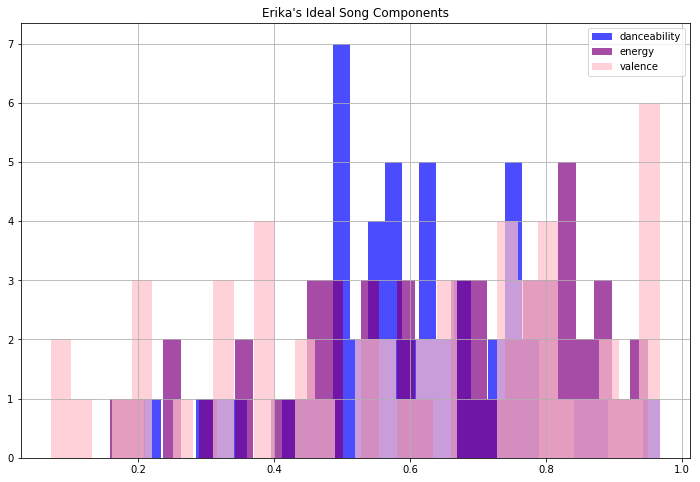

In [132]:
fig = plt.figure(figsize=(12,8))
plt.title("Erika's Ideal Song Components")
dance.hist(alpha=.7, bins=30, label='danceability', color ="blue")
#speechiness.hist(alpha=.7, bins=30, label='speechiness',color ="green")
energy.hist(alpha=.7, bins=30, label='energy',color ="purple")
valence.hist(alpha=.7, bins=30, label='valence',color ="pink")
plt.legend(loc='upper right')